In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import missingno
from collections import Counter
import scipy
import plotly.plotly as py
from collections import Counter
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
# schoolStudent's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# sexStudent's sex (binary: 'F' - female or 'M' - male)
# ageStudent's age (numeric: from 15 to 22)
# addressStudent's home address type (binary: 'U' - urban or 'R' - rural)
# famsizeFamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# PstatusParent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
# MeduMother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
# FeduFather's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
# MjobMother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# FjobFather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# reasonReason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# guardianStudent's guardian (nominal: 'mother', 'father' or 'other')
# traveltimeHome to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# studytimeWeekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# failuresNumber of past class failures (numeric: n if 1<=n<3, else 4)
# schoolsupExtra educational support (binary: yes or no)
# famsupFamily educational support (binary: yes or no)
# paidExtra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# activitiesExtra-curricular activities (binary: yes or no)
# nurseryAttended nursery school (binary: yes or no)
# higherWants to take higher education (binary: yes or no)
# internetInternet access at home (binary: yes or no)
# romanticWith a romantic relationship (binary: yes or no)
# famrelQuality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# freetimeFree time after school (numeric: from 1 - very low to 5 - very high)
# gooutGoing out with friends (numeric: from 1 - very low to 5 - very high)
# DalcWorkday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# WalcWeekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# healthCurrent health status (numeric: from 1 - very bad to 5 - very good)
# absencesNumber of school absences (numeric: from 0 to 93)
# G1First period grade (numeric: from 0 to 20)
# G2Second period grade (numeric: from 0 to 20)
# G3Final grade (numeric: from 0 to 20, output target)

In [3]:
alcohol = pd.read_csv('alcohol.csv')

In [4]:
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
alcohol.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [529]:
alcohol.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [480]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [400]:
#This dataset has No missing values

In [401]:
# Confirming this graphically by missingno where the black represents available data and the white represents the missing data.

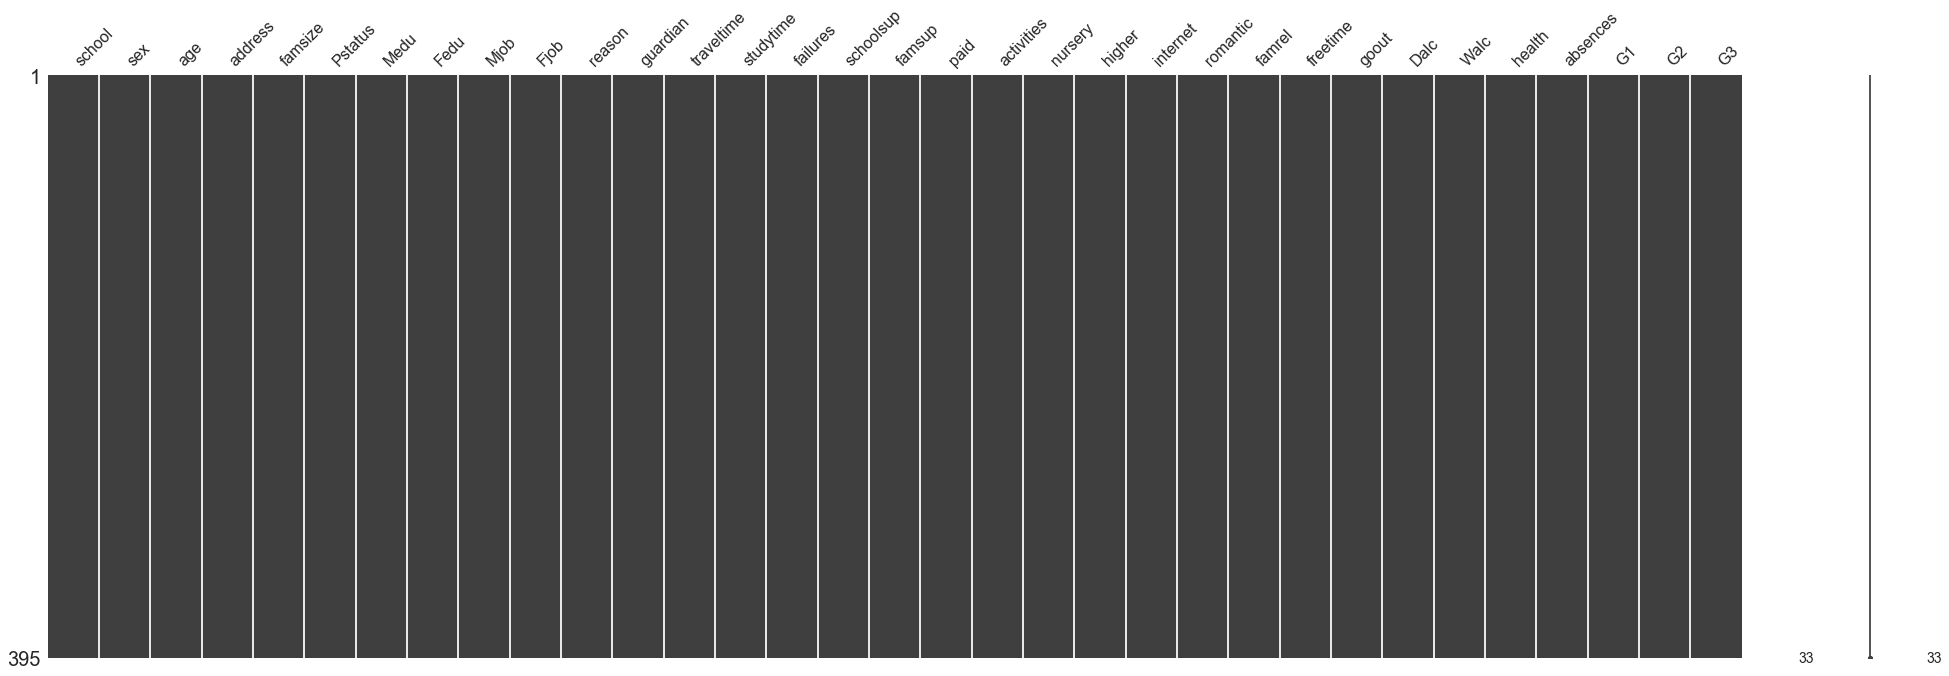

In [402]:
missingno.matrix(alcohol, figsize = (30,10))

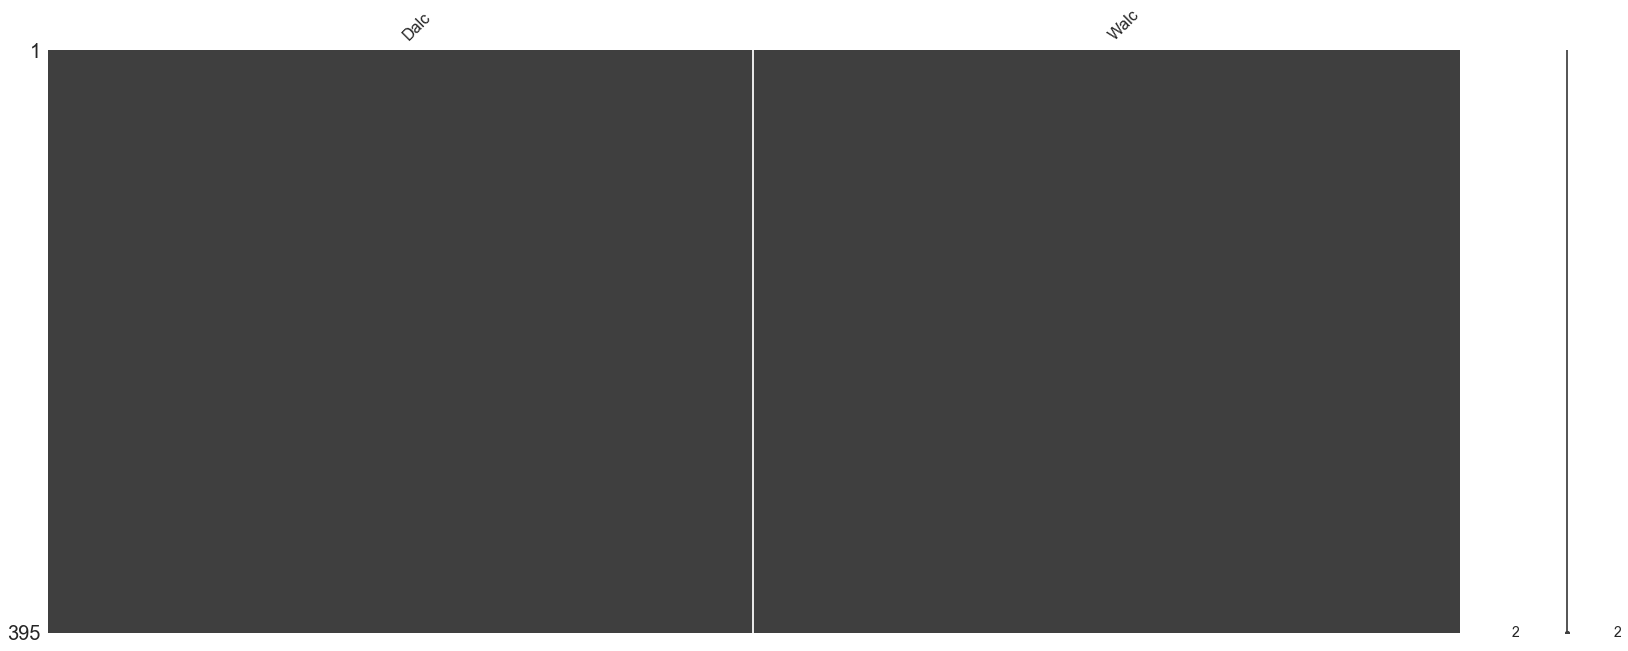

In [403]:
studentConsumption = alcohol.loc[:,["Dalc","Walc"]]
import missingno as msno
msno.matrix(studentConsumption)
plt.show()

In [ ]:
# Numerical data analysis

In [404]:
alcohol.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


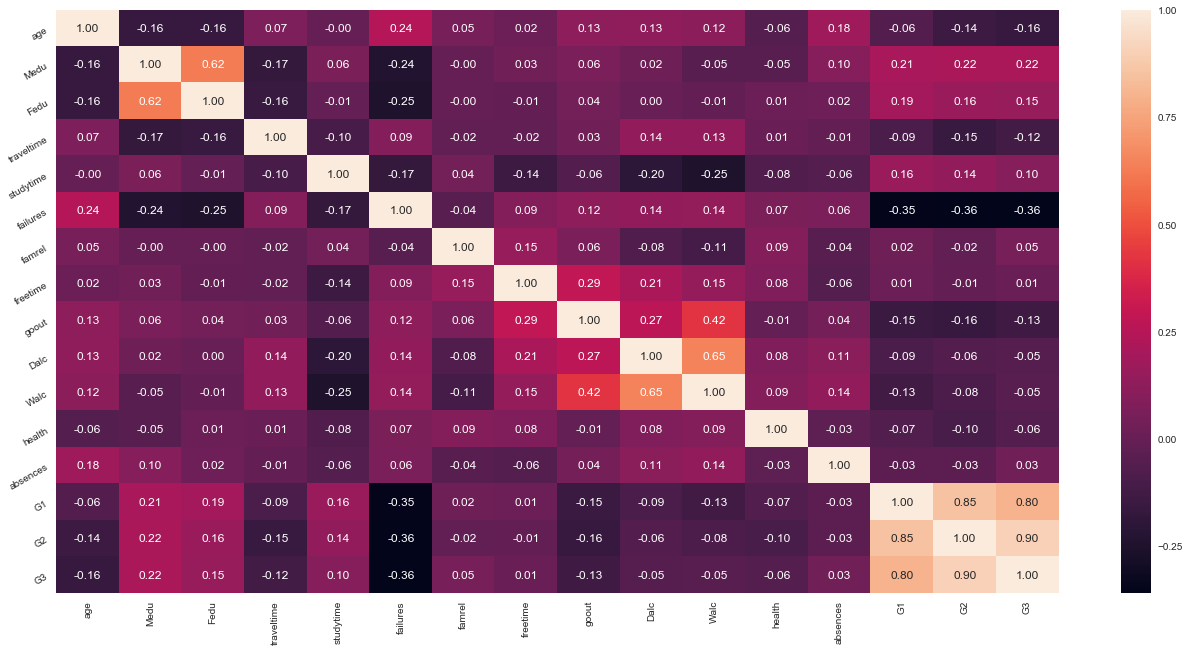

In [405]:
corr = alcohol.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,10))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

TypeError: 'str' object is not callable

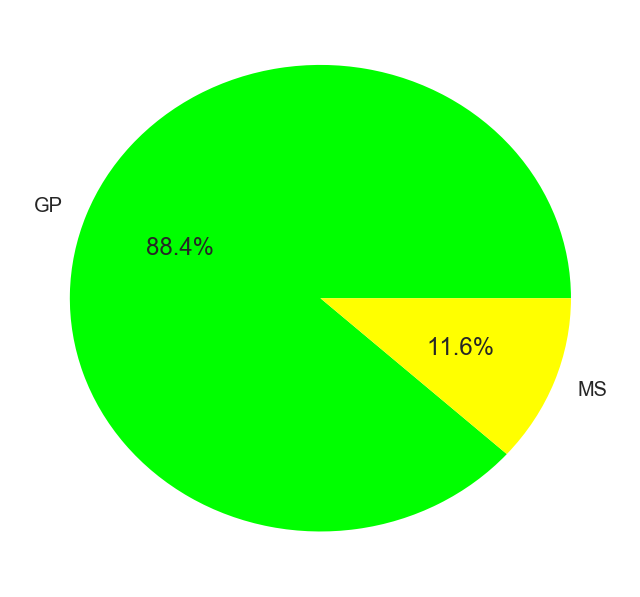

In [517]:
labelsSchool = alcohol.school.value_counts().index
colorsSchool = ['lime','yellow']
explodeSchool = [0,0]
valuesSchool = alcohol.school.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(valuesSchool,explode=explodeSchool,labels=labelsSchool,colors=colorsSchool,autopct='%1.1f%%')
plt.title("School Ratios",color="black",fontsize=15)
plt.show()

In [528]:
school_list = list(alcohol.school.unique())
age_mean = []
for i in school_list:
    x = alcohol[alcohol.school == i]
    age_sum = sum(x.age)/len(x)
    age_mean.append(age_sum)

data = pd.DataFrame({'school_list':school_list,'age_mean':age_mean})
new_index = (data['age_mean'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(5,5)
sns.barplot(x=sorted_data['school_list'],y=sorted_data['age_mean'])
plt.xticks(rotation=90)
plt.title("School vs Average Age")
plt.xlabel("School")
plt.ylabel("Age Mean")
plt.show()

SyntaxError: invalid syntax (<ipython-input-528-be940034ce42>, line 12)

TypeError: 'str' object is not callable

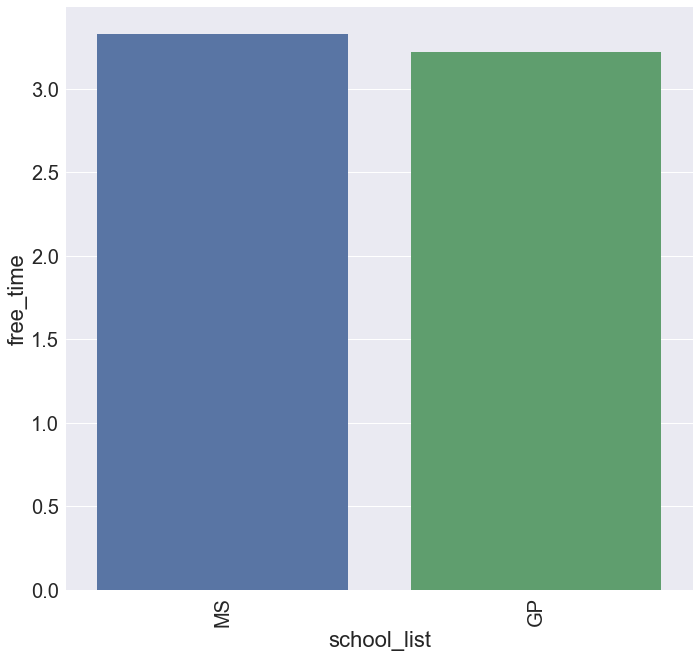

In [523]:
school_list = list(alcohol.school.unique())
free_time = []
for i in school_list:
    x = alcohol[alcohol.school == i]
    freeTime = sum(x.freetime)/len(x)
    free_time.append(freeTime)

data = pd.DataFrame({'school_list':school_list,'free_time':free_time})
new_index = (data['free_time'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data2['school_list'],y=sorted_data2['free_time'])
plt.xticks(rotation=90)
plt.title("School versus Student Free Time")
plt.xlabel("School")
plt.ylabel("Free Time")
plt.show()

In [425]:
GP.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,16.52149,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971
std,1.21661,1.068566,1.080482,0.666910,0.851998,0.734409,0.873358,0.986354,1.122704,0.857959,1.307881,1.382607,8.341764,3.319109,3.808434,4.625397
min,15.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.00000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,16.00000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,17.00000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.00000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


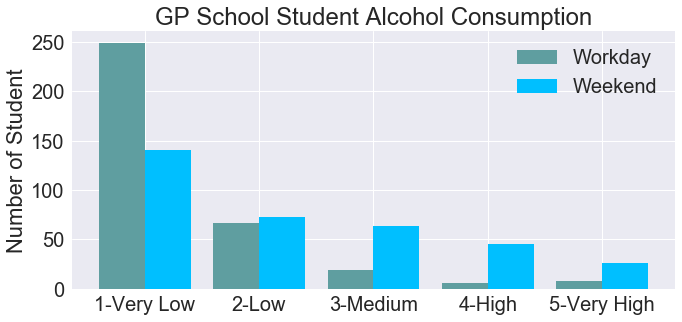

In [421]:
GP=alcohol[alcohol.school=="GP"]
MS= alcohol[alcohol.school =="MS"]
l=[1,2,3,4,5] #Alcohol consumption level
labels="1-Very Low","2-Low","3-Medium","4-High","5-Very High"
GP_workday= list(map(lambda l: list(GP.Dalc).count(l),l))
GP_weekend= list(map(lambda l: list(GP.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, GP_workday, w, color="cadetblue")
plot2= plt.bar(i+w, GP_weekend, w, color="deepskyblue" )

plt.ylabel('Number of Student')
plt.title('GP School Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

In [426]:
MS.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826
std,0.881643,1.215043,1.128678,0.755015,0.708813,0.808470,1.060489,1.096547,1.050420,1.078781,1.110338,1.452634,4.274913,3.347001,3.377175,4.237229
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,0.000000
25%,17.250000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.250000,0.000000,8.000000,8.000000,8.000000
50%,18.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,10.500000,10.000000,10.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.750000,13.000000,12.750000,12.750000
max,21.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,17.000000,19.000000,18.000000,19.000000


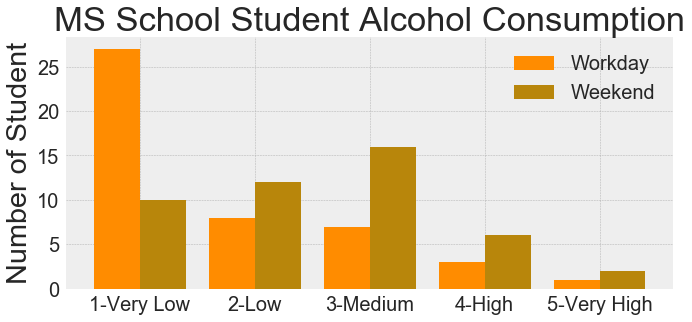

In [422]:
GP=alcohol[alcohol.school=="GP"]
MS= alcohol[alcohol.school =="MS"]
l=[1,2,3,4,5] 
labels="1-Very Low","2-Low","3-Medium","4-High","5-Very High"
MS_workday= list(map(lambda l: list(MS.Dalc).count(l),l))
MS_weekend= list(map(lambda l: list(MS.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, MS_workday, w, color="darkorange")
plot2= plt.bar(i+w, MS_weekend, w, color="darkgoldenrod" )

plt.ylabel('Number of Student')
plt.title('MS School Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

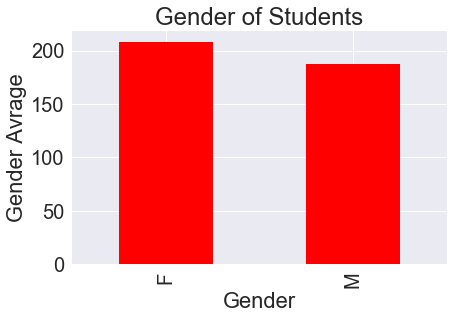

In [409]:

alcohol['sex'].value_counts().plot(kind='bar',color='red')
plt.title("Gender of Students")
plt.ylabel('Gender Avrage')
plt.xlabel('Gender');

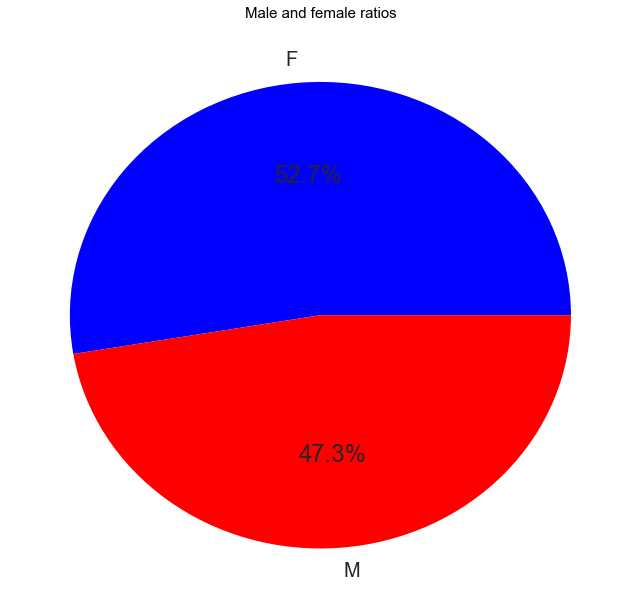

In [410]:
labelsSex = alcohol.sex.value_counts().index
colorsSex = ['blue','red']
explodeSex = [0,0]
valuesSex = alcohol.sex.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(valuesSex,explode=explodeSex,labels=labelsSex,colors=colorsSex,autopct='%1.1f%%')
plt.title("Male and female ratios",color="black",fontsize=15)
plt.show()

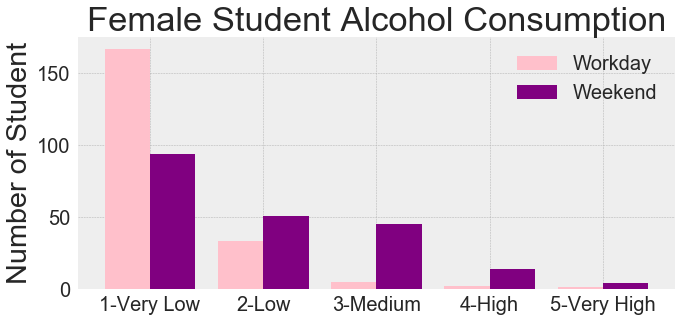

In [423]:
#sex
female=alcohol[alcohol.sex=="F"]
male= alcohol[alcohol.sex=="M"]
l=[1,2,3,4,5] #Alcohol consumption level
labels="1-Very Low","2-Low","3-Medium","4-High","5-Very High"
female_workday= list(map(lambda l: list(female.Dalc).count(l),l))
female_weekend= list(map(lambda l: list(female.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, female_workday, w, color="pink")
plot2= plt.bar(i+w, female_weekend, w, color="purple" )

plt.ylabel('Number of Student')
plt.title('Female Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

In [ ]:
On the working days, female students alcohol consumtion level is generally very low, however on the weekends they consumes more alcohol medium-high level

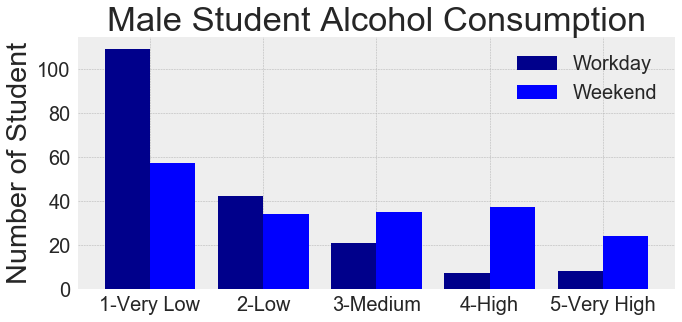

In [424]:
male_workday= list(map(lambda l: list(male.Dalc).count(l),l))
male_weekend= list(map(lambda l: list(male.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, male_workday, w, color="darkblue")
plot2= plt.bar(i+w,male_weekend, w, color="blue" )

plt.ylabel("Number of Student")
plt.title("Male Student Alcohol Consumption")
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()


In [441]:
trace = go.Scatter3d(
    x = alcohol.age,
    y = alcohol.Dalc,
    z = alcohol.Walc,
    mode = 'markers',

    marker = dict(
        size = 10,
        color = alcohol.age,
        colorscale = 'jet'
    )
)
dataTrace = [trace]
layoutTrace = go.Layout(
    margin = dict(
    l = 0,
    r = 0,
    b = 0,
    t = 0 )
)
figTrace = go.Figure(data=dataTrace, layout=layoutTrace)
plt.title ="Alcohol Consumption by Student Age"
iplot(figTrace)

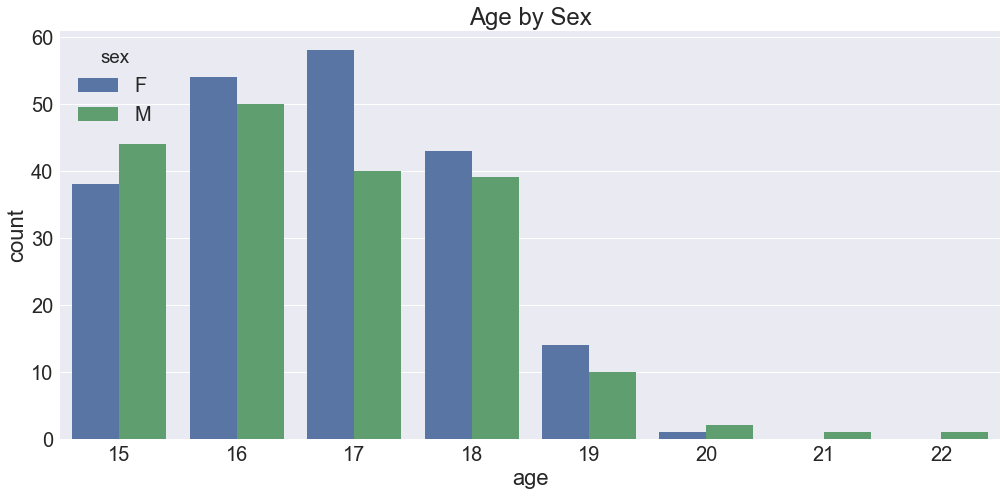

In [428]:
plt.figure(figsize=(15,7))
sns.set(font_scale=2)
plt.title("Age by Sex")
sns.countplot(x=alcohol.age,hue=alcohol.sex);

In [525]:
# fig = plt.figure(figsize=(10,10))
# sns.countplot(y=alcohol['age'], data=alcohol);

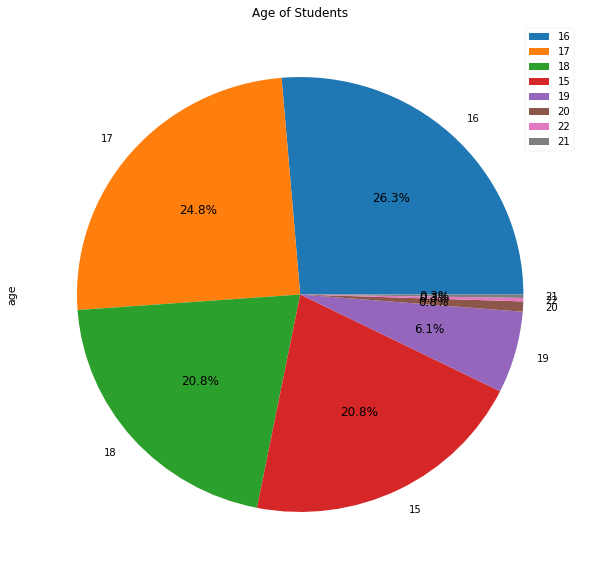

In [88]:
alcohol['age'].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%')
sizes = (np.array((ages / ages.sum())*100))
plt.title("Age of Students")
plt.legend(labels)


In [433]:
trace1 = go.Box(
    y = alcohol.Dalc,
    name = "Workday alcohol consumption",
    marker = dict(color = "red")
)
trace2 = go.Box(
    y = alcohol.Walc,
    name = "Weekend alcohol consumption",
    marker = dict(color = "blue")
)
trace3 = go.Box(
    y = alcohol.goout,
    name = "Going out with friends",
    marker = dict(color = "violet")
)    
concatTrace = [trace1,trace2,trace3]
iplot(concatTrace)

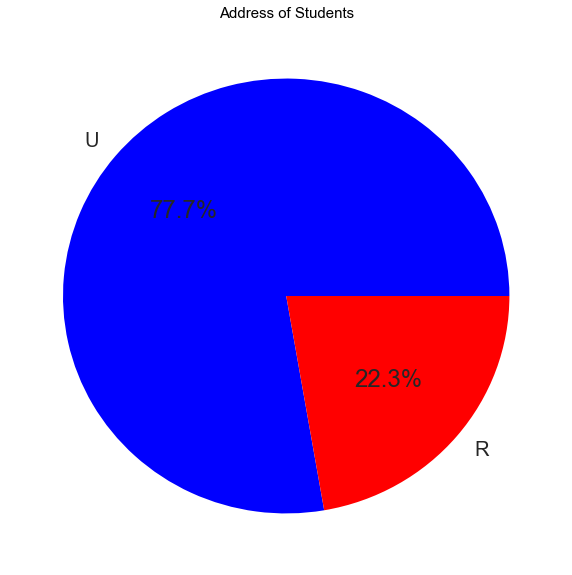

In [269]:
labelsAddress = alcohol.address.value_counts().index
colorsAddress = ['blue','red']
explodeAddress = [0,0]
valuesAddress = alcohol.address.value_counts().values

#Visualitizion
plt.figure(figsize=(10,10))
plt.pie(valuesAddress,explode=explodeAddress,labels=labelsAddress,colors=colorsAddress,autopct='%1.1f%%')
plt.title("Address of Students",color="black",fontsize=15)
plt.show()

Text(0.5,1,'Students address: U - urban, R - rural')

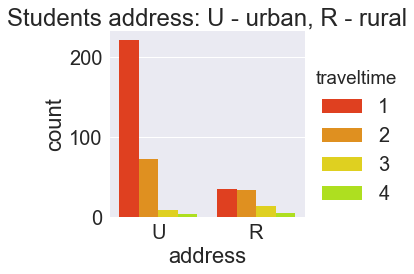

In [270]:
sns.factorplot(x="address", kind="count",hue = "traveltime",palette="prism", data=alcohol)
plt.title("Students address: U - urban, R - rural")

In [442]:
urban.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,16.596091,2.830619,2.563518,1.325733,2.026059,0.302932,3.951140,3.254072,3.149837,1.436482,2.221498,3.524430,5.589577,11.032573,10.967427,10.674267
std,1.260142,1.086447,1.071788,0.581374,0.816079,0.720447,0.900739,0.967076,1.086319,0.869812,1.274355,1.400941,7.506051,3.285776,3.690508,4.563075
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,9.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


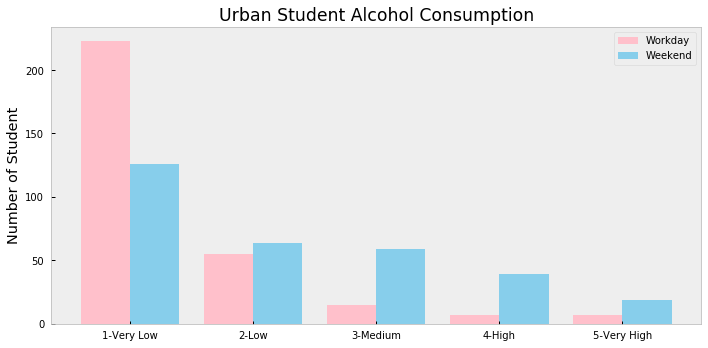

In [139]:
urban=alcohol[alcohol.address=="U"]
rural= alcohol[alcohol.address=="R"]
urban_workday=list(map(lambda l: list(urban.Dalc).count(l),l))
urban_weekend=list(map(lambda l: list(urban.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)   
w = 0.4   

plot1= plt.bar(i, urban_workday, w, color="pink")
plot2= plt.bar(i+w, urban_weekend, w, color="skyblue" )

plt.ylabel('Number of Student')
plt.title('Urban Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.grid()
plt.show()

In [443]:
rural.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,17.045455,2.465909,2.375000,1.875000,2.068182,0.443182,3.920455,3.170455,2.965909,1.636364,2.534091,3.659091,6.125000,10.477273,9.829545,9.511364
std,1.276751,1.082238,1.137779,0.881646,0.919713,0.814494,0.886963,1.106112,1.198168,0.949069,1.312617,1.355164,9.574646,3.417256,3.892881,4.556149
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,8.000000,8.000000,7.000000
50%,17.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.000000,10.000000,10.000000
75%,18.000000,3.000000,3.000000,2.000000,3.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,12.000000,12.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,18.000000,19.000000


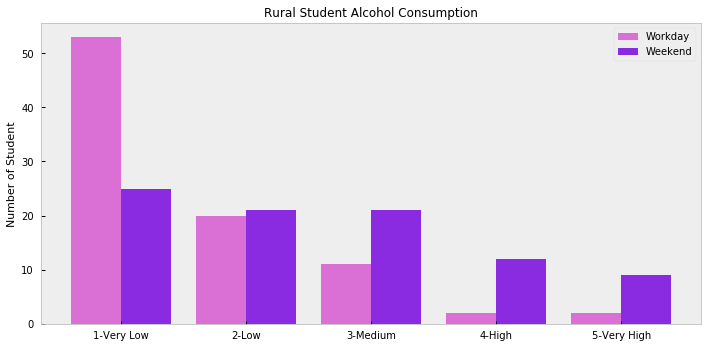

In [143]:
rural_workday=list(map(lambda l: list(rural.Dalc).count(l),l))
rural_weekend=list(map(lambda l: list(rural.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4 
p1= plt.bar(i, rural_workday, w, color="orchid")
p2= plt.bar(i+w,rural_weekend, w, color="blueviolet" )

plt.ylabel('Number of Student')
plt.title('Rural Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((p1[0],p2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.grid()
plt.show()

In [448]:
alcohol.Fjob.value_counts (dropna=False)

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

TypeError: 'str' object is not callable

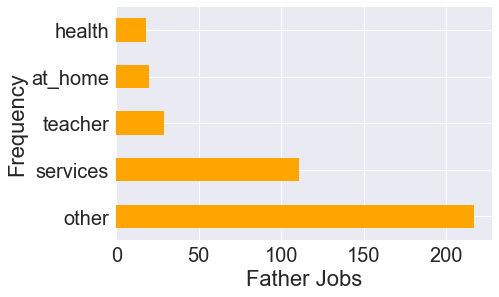

In [463]:
alcohol['Fjob'].value_counts().plot(kind='barh',color='orange')
plt.xlabel("Father Jobs")
plt.ylabel("Frequency")
plt.title("The profession of fathers")



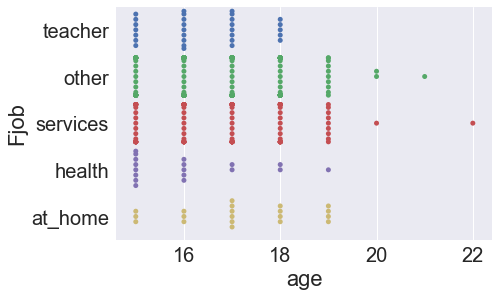

In [452]:
sns.swarmplot(x="age",y="Fjob",data=alcohol)

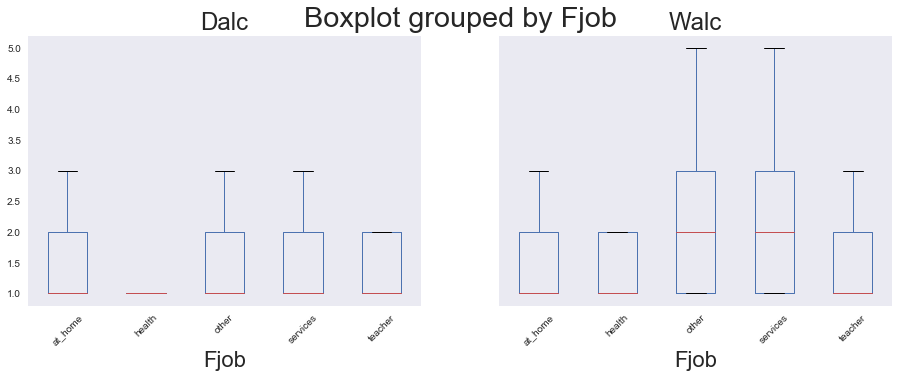

In [268]:
alcohol.boxplot(column=["Dalc","Walc"],by="Fjob",rot=45, fontsize=10,figsize=(15,5),grid=False)
plt.show()

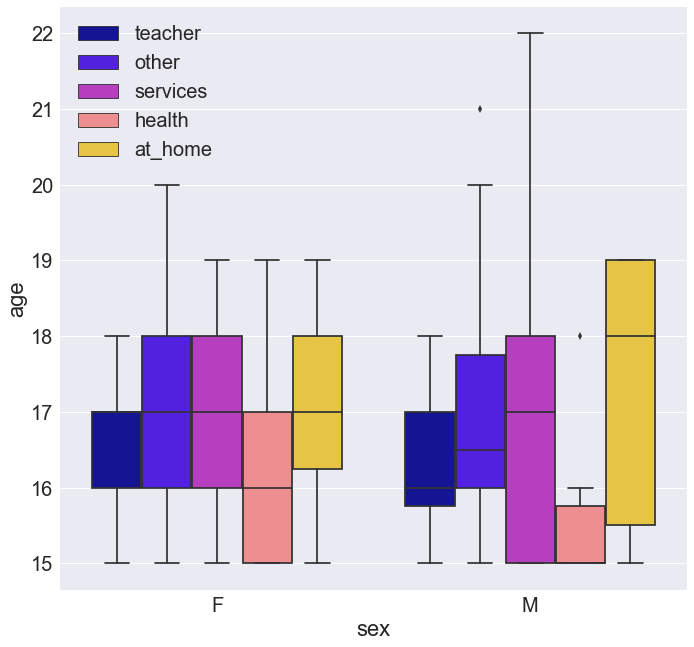

In [447]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="age", hue="Fjob", data=alcohol, palette="gnuplot2") #hue=class.
plt.legend()
plt.show()

In [446]:
alcohol.Mjob.value_counts (dropna=False)

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Text(0.5,1,'The profession of all mothers in both schools')

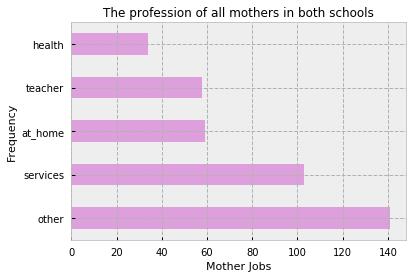

In [157]:
alcohol['Mjob'].value_counts().plot(kind='barh',color='plum')
plt.xlabel("Mother Jobs")
plt.ylabel("Frequency")
plt.title("The profession of all mothers in both schools")

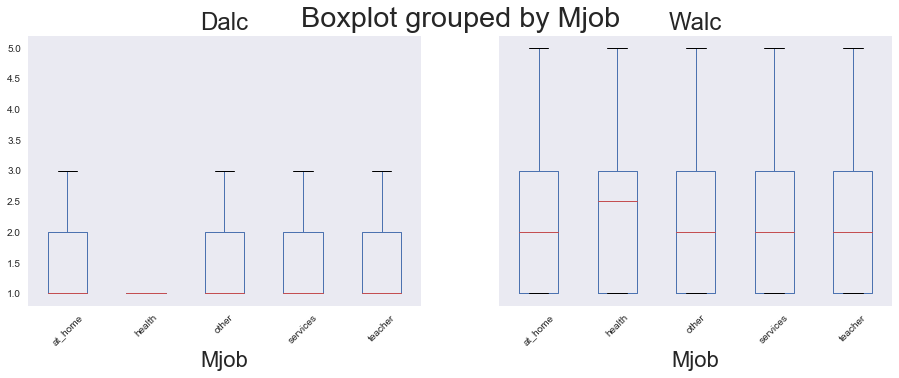

In [460]:
alcohol.boxplot(column=["Dalc","Walc"],by="Mjob",rot=45, fontsize=10,figsize=(15,5),grid=False)
plt.show()

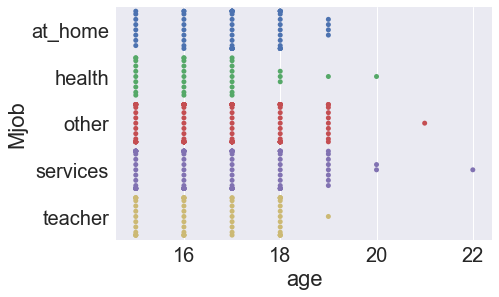

In [456]:
sns.swarmplot(x="age",y="Mjob",data=alcohol)

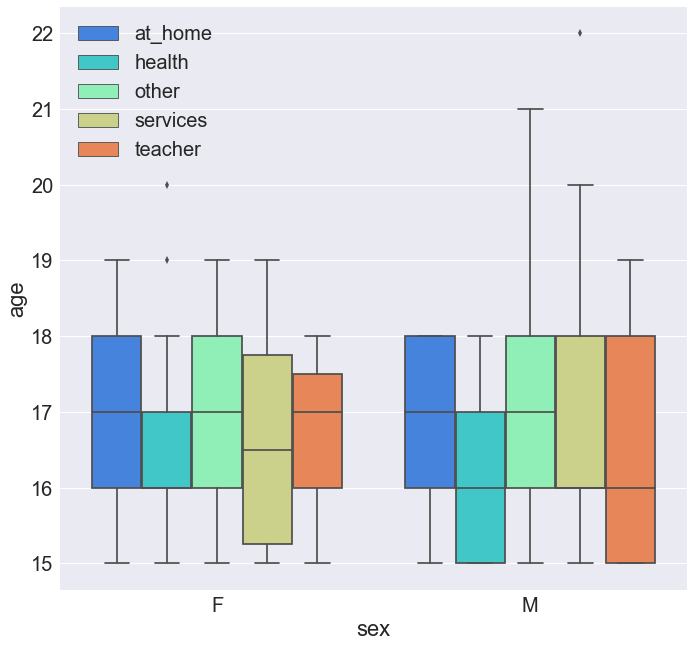

In [465]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="age", hue="Mjob", data=alcohol, palette="rainbow") #hue=class.
plt.legend()
plt.show()

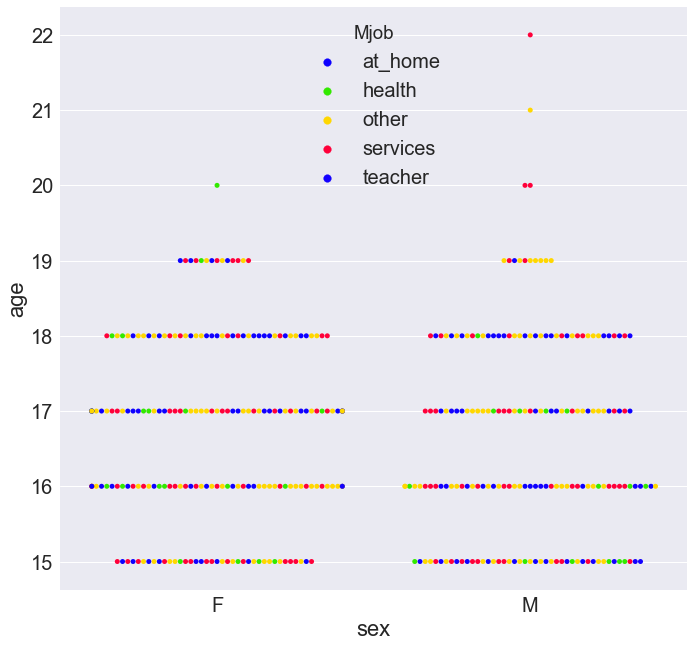

In [457]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="sex", y="age",hue="Mjob", data=alcohol, palette="prism")
plt.show()

In [482]:
alcohol.health.value_counts (dropna=False)

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64

TypeError: 'str' object is not callable

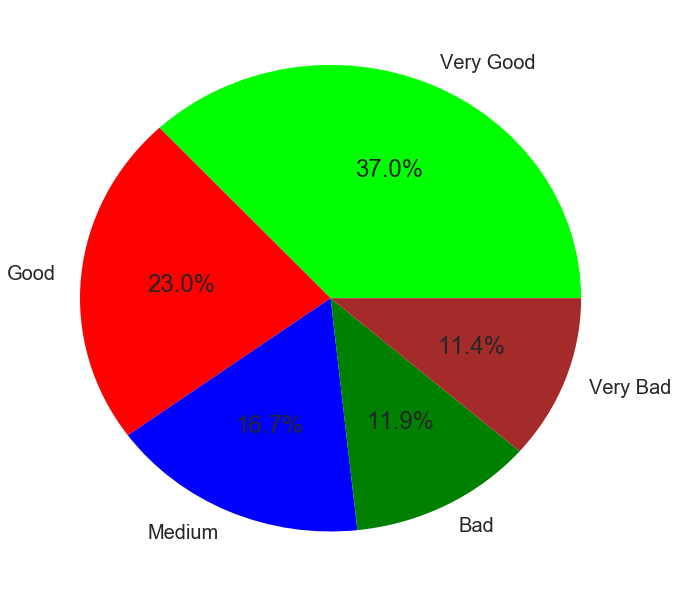

In [484]:
# labels = alcohol.health.value_counts().index 
labels = ['Very Good', 'Good', 'Medium', 'Bad','Very Bad']
colors = ['lime','red','blue','green','brown']
explode = [0,0,0,0,0]
values = alcohol.health.value_counts().values 

plt.figure(figsize=(10,10))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Health status of students",color="black",fontsize=15)
#plt.legend(labels)
plt.show()

# 1 Very Bad
# 2 Bad
# 3 Medium
# 4 Good
# 5 Very Good

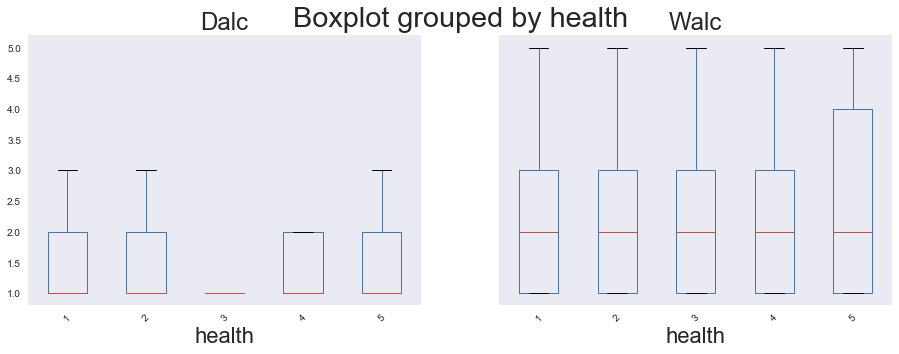

In [271]:
alcohol.boxplot(column=["Dalc","Walc"],by="health",rot=45, fontsize=10,figsize=(15,5),grid=False)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



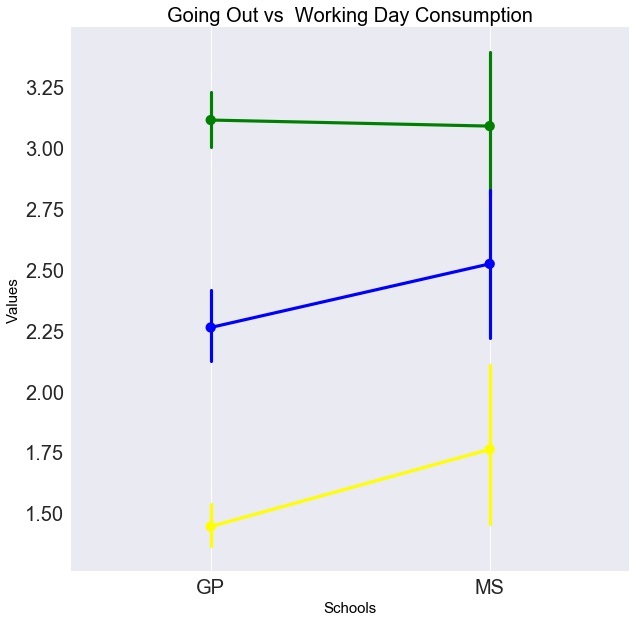

In [191]:
f,ax2=plt.subplots(figsize=(10,10))
sns.pointplot(x="school",y='goout',data=alcohol,color='green',alpha=0.8)
sns.pointplot(x="school",y='Dalc',data=alcohol,color='yellow',alpha=0.8)
sns.pointplot(x="school",y='Walc',data=alcohol,color='blue',alpha=0.8)

plt.xlabel('Schools',fontsize = 15,color='black')
plt.ylabel('Values',fontsize = 15,color='black')
plt.title('Going Out vs Alcohol Consumption',fontsize = 20,color='black')
plt.grid()
plt.show()

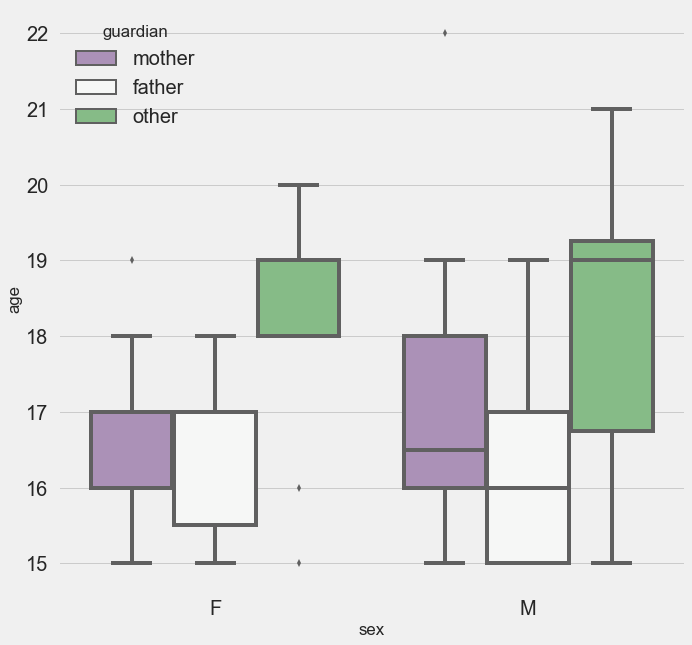

In [380]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="age", hue="guardian", data=alcohol, palette="PRGn") #hue=class.
plt.show()

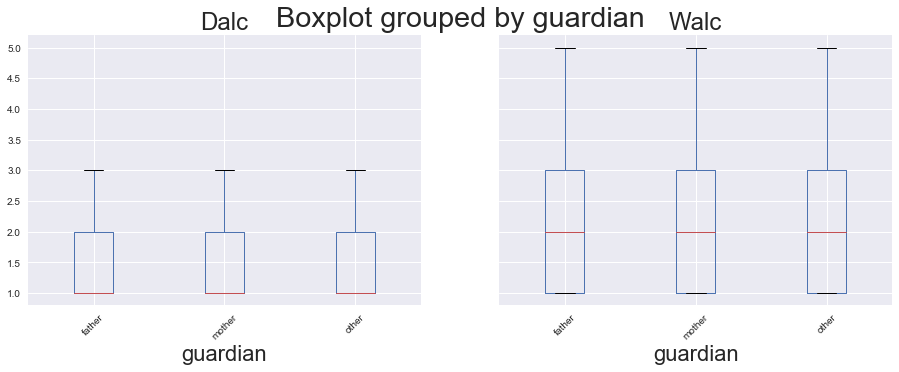

In [486]:
alcohol.boxplot(column=["Dalc","Walc"],by="guardian",rot=45, fontsize=10,figsize=(15,5),grid=True)
plt.show()

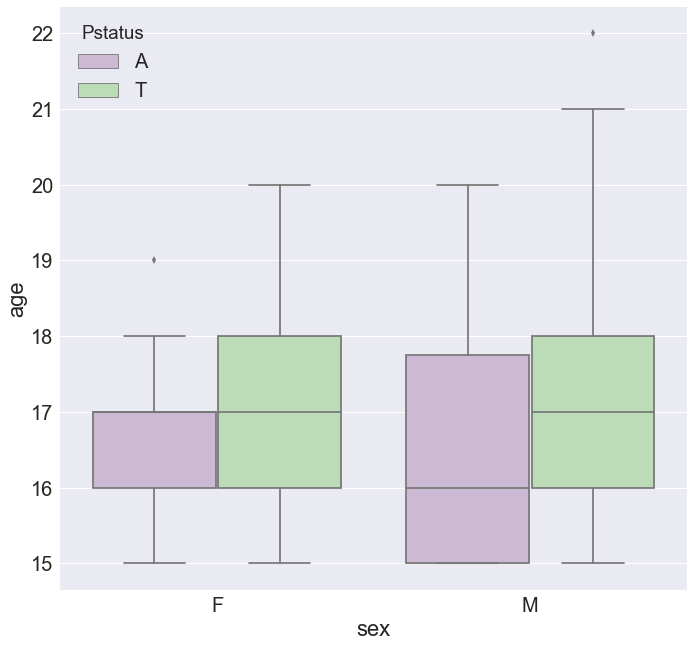

In [487]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="age", hue="Pstatus", data=alcohol, palette="PRGn") #hue=class.
plt.show()

In [492]:
pstatus=pd.concat([alcohol.Pstatus,alcohol.Dalc,alcohol.Walc],axis=1)
t=pstatus[pstatus.Pstatus=="T"]

In [496]:
t.describe()

,Dalc,Walc
count,354.000000,354.000000
mean,1.471751,2.293785
std,0.874922,1.265635
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,5.000000,5.000000


TypeError: 'str' object is not callable

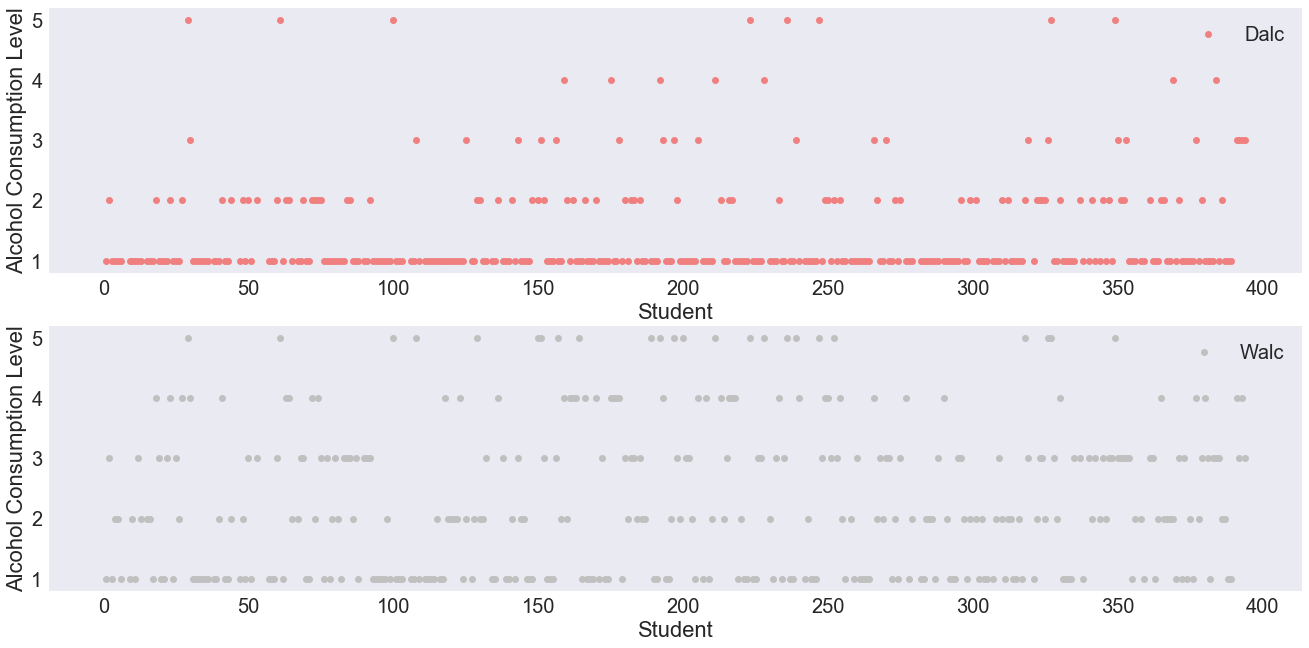

In [495]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t.Dalc,"ro",color="lightcoral")
plt.grid()
plt.legend()
plt.ylabel("Alcohol Consumption Level")
plt.xlabel("Student")
# plt.title("Working Day Alcohol Consumption of Students who Parents Living Together")
plt.subplot(2,1,2)
plt.plot(t.Walc,"ro",color="silver")
plt.grid()
plt.legend()
plt.ylabel("Alcohol Consumption Level")
plt.xlabel("Student")
plt.title("Weekend Alcohol Consumption of Students who Parents Living Together")
plt.show()

In [494]:
a=pstatus[(pstatus.Pstatus=="A")]

In [497]:
a.describe()

,Dalc,Walc
count,41.000000,41.000000
mean,1.560976,2.268293
std,1.025885,1.483651
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,4.000000
max,5.000000,5.000000


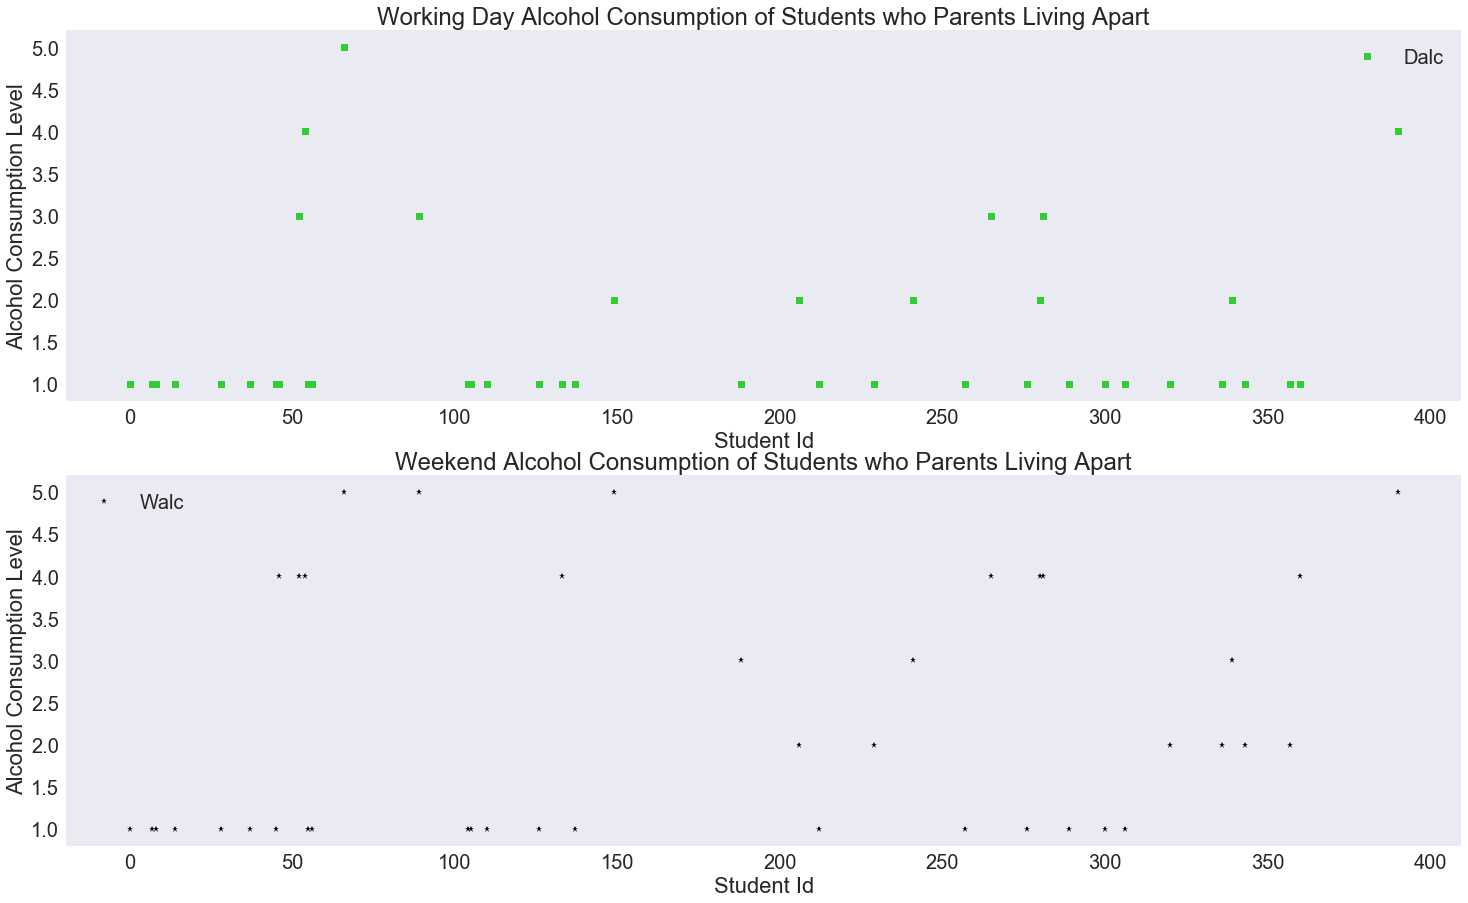

In [285]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
plt.plot(a.Dalc,"bs",color="limegreen")
plt.legend()
plt.grid()
plt.ylabel("Alcohol Consumption Level")
plt.xlabel("Student")
plt.title("Working Day Alcohol Consumption of Students who Parents Living Apart")
plt.subplot(2,1,2)
plt.plot(a.Walc,"g*",color="black")
plt.ylabel("Alcohol Consumption Level")
plt.xlabel("Student")
plt.legend()
plt.title("Weekend Alcohol Consumption of Students who Parents Living Apart")
plt.grid()
plt.show()

Text(0,0.5,'Number of Students')

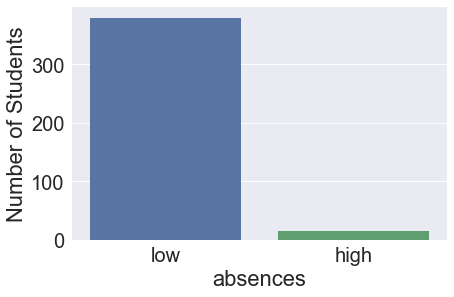

In [502]:
#number of absences
S20=["high" if i >20 else "low" for i in alcohol.absences]
df=pd.DataFrame({"absences":S20})
sns.countplot(x=df.absences)
plt.ylabel('Number of Students')
#plt.title('Absences of students',color = 'black',fontsize=15)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of absences versus little Dalc')

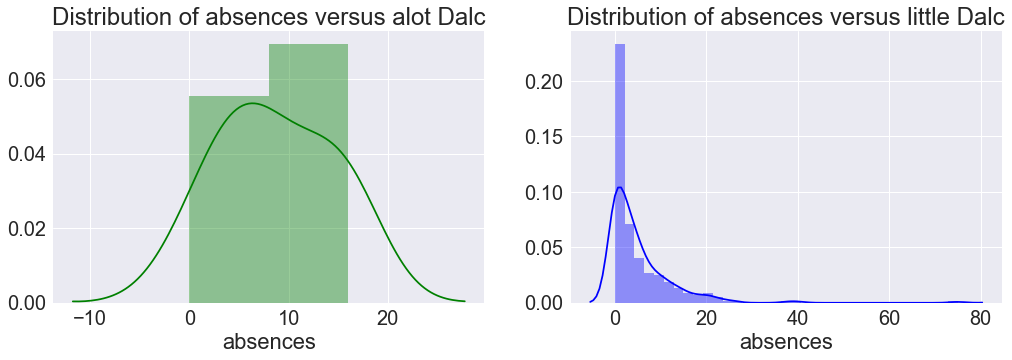

In [263]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(alcohol[(alcohol.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences versus alot Dalc')

ax=f.add_subplot(122)
sns.distplot(alcohol[(alcohol.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences versus little Dalc')

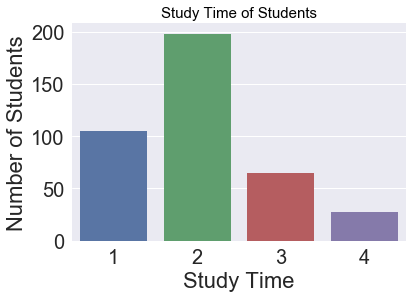

In [232]:
sns.countplot(alcohol.studytime)
plt.title("Study Time of Students",color = 'black',fontsize=15)
plt.ylabel("Number of Students")
plt.xlabel("Study Time")
plt.show()

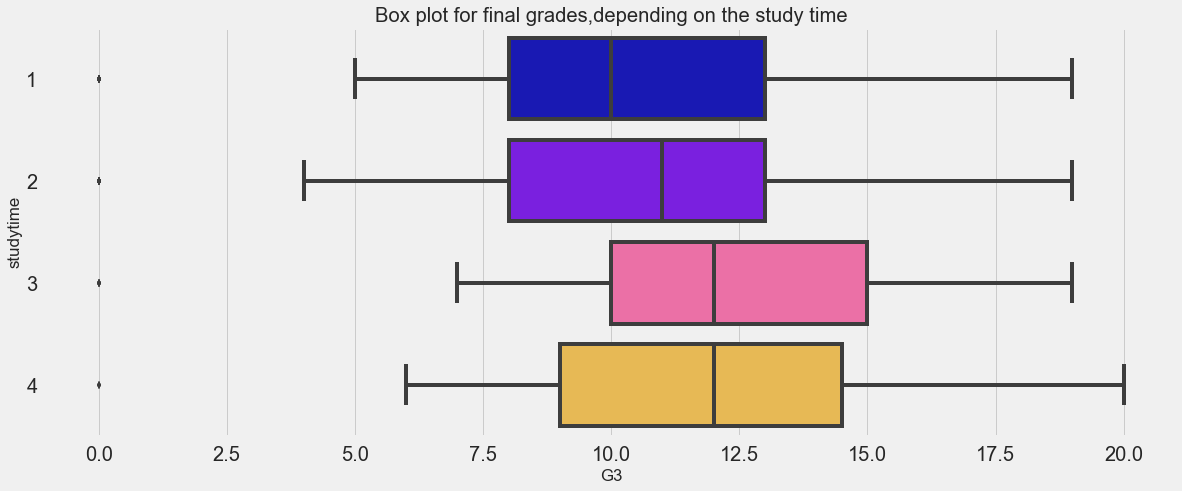

In [300]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="studytime", x="G3", data = alcohol , orient="h", palette = 'gnuplot2')

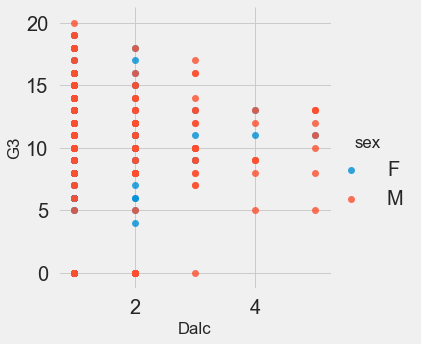

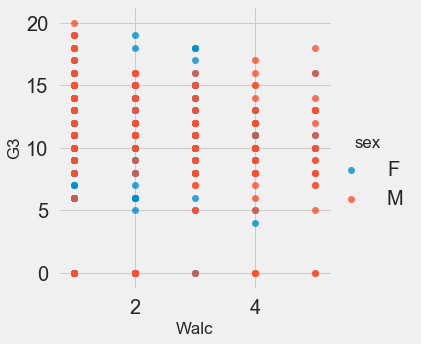

In [304]:
g = sns.lmplot('Dalc',"G3", alcohol, hue="sex", fit_reg=False);
g = sns.lmplot('Walc',"G3", alcohol, hue="sex", fit_reg=False);

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of grades versus little Dalc')

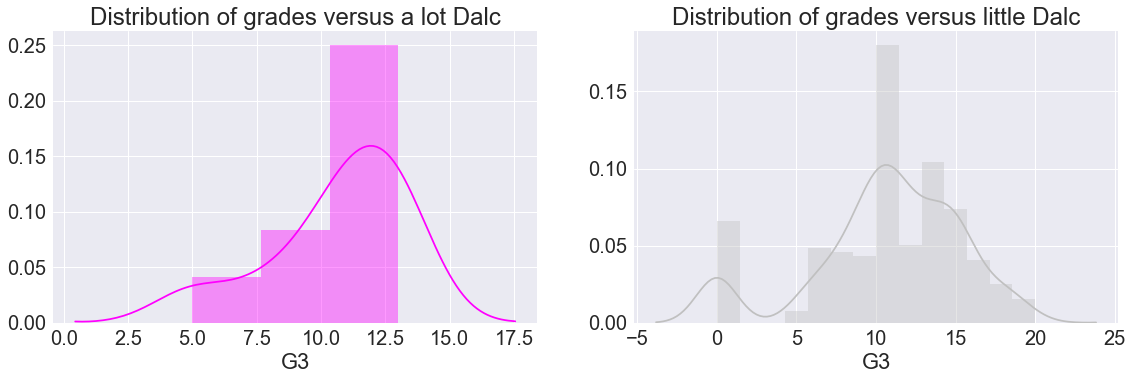

In [504]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(alcohol[(alcohol.Dalc == 5)]["G3"],color='fuchsia',ax=ax)
ax.set_title('Distribution of grades versus a lot Dalc')

ax=f.add_subplot(122)
sns.distplot(alcohol[(alcohol.Dalc == 1)]['G3'],color='silver',ax=ax)
ax.set_title('Distribution of grades versus little Dalc')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of grades versus little Walc')

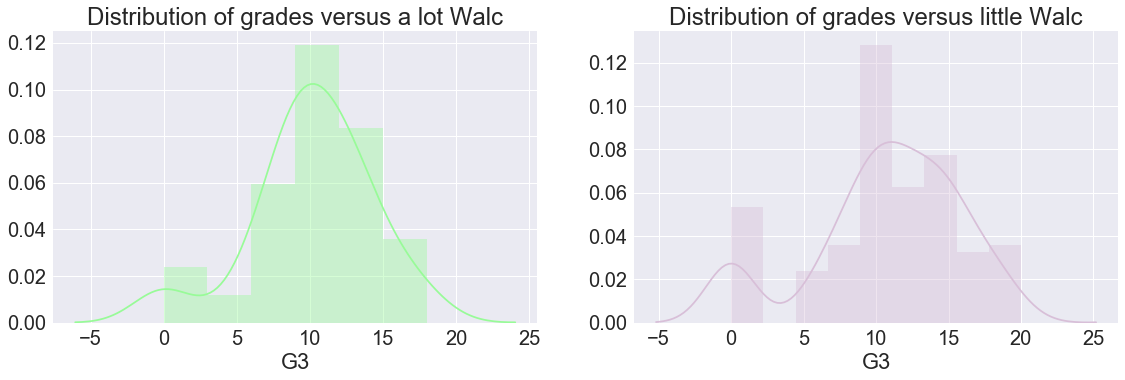

In [505]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(alcohol[(alcohol.Walc == 5)]["G3"],color='palegreen',ax=ax)
ax.set_title('Distribution of grades versus a lot Walc')

ax=f.add_subplot(122)
sns.distplot(alcohol[(alcohol.Walc == 1)]['G3'],color='thistle',ax=ax)
ax.set_title('Distribution of grades versus little Walc')

In [509]:
alcohol.romantic.value_counts (dropna=False)

no     263
yes    132
Name: romantic, dtype: int64

Text(0.5,1,'In a Romantic Relationship or not')

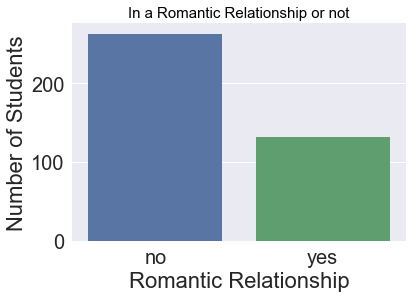

In [257]:
# Having romantic relation for students
sns.countplot(alcohol.romantic)
plt.xlabel('Romantic Relationship')
plt.ylabel('Number of Students')
plt.title('In a Romantic Relationship or not',color = 'black', fontsize = 15)

In [507]:
# plot1 = sns.factorplot("failures","Walc", data=alcohol)
# plot1.set(ylabel="failures", xlabel="Weekend Alcohol Consumption")

# plot2 = sns.factorplot("failures", "Dalc", data=alcohol)
# plot2.set(ylabel="failures", xlabel="Workday Alcohol Consumption")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of grades of students in relationships')

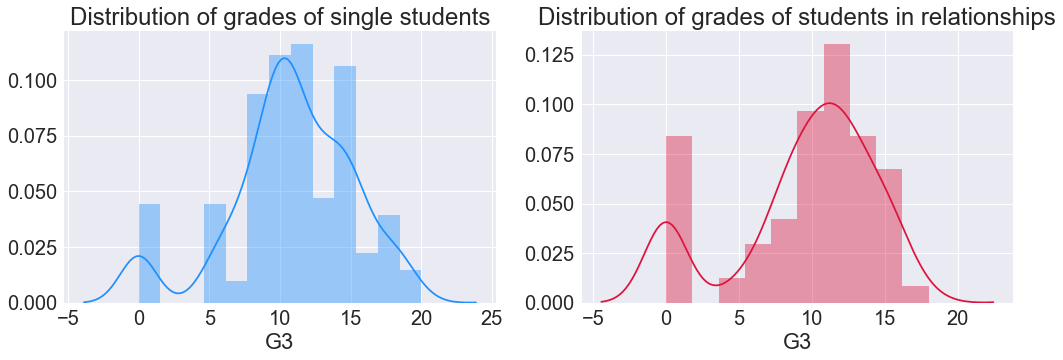

In [256]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(alcohol[(alcohol.romantic == 'no')]["G3"],color='dodgerblue',ax=ax)
ax.set_title('Distribution of grades of single students')

ax=f.add_subplot(122)
sns.distplot(alcohol[(alcohol.romantic == 'yes')]['G3'],color='crimson',ax=ax)
ax.set_title('Distribution of grades of students in relationships')

In [506]:
# sns.countplot(alcohol.reason)
# plt.title("Choosing Reason of School",color = 'black',fontsize=15)
# plt.ylabel("Number of Students")
# plt.xlabel("Reason")
# plt.show()

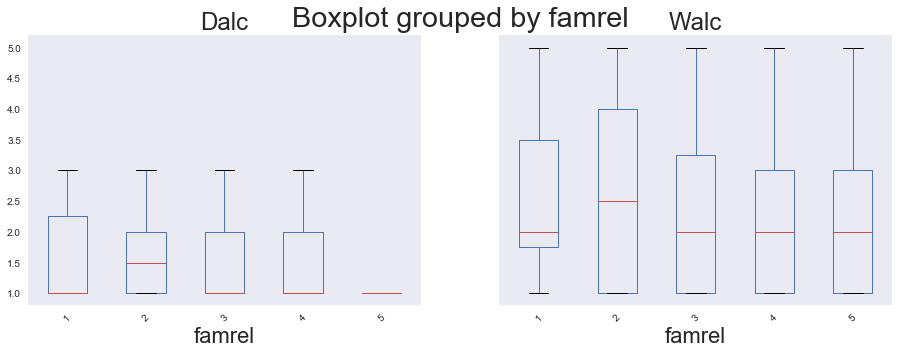

In [292]:
student.boxplot(column=["Dalc","Walc"],by="famrel",rot=45, fontsize=10,figsize=(15,5),grid=False)
plt.show()

In [510]:
# alcohol= alcohol['internet'].value_counts()
# alcohol.head(10).plot.bar()
# # alcohol.head(20)

# # # Drive-wheels
# alcohol['internet'].value_counts().plot(kind='bar',color='red')
# plt.title("Drive Wheels ")
# plt.ylabel('Number of vehicles')
# plt.xlabel('Drive wheels');


In [526]:
alcohol.internet.value_counts (dropna=False)

yes    329
no      66
Name: internet, dtype: int64

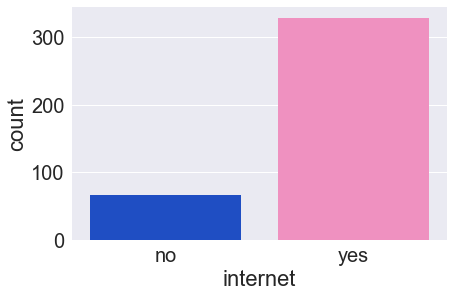

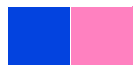

In [527]:
colors = ["blue", "pink"]
ax = sns.countplot(x="internet", data=alcohol, palette=sns.xkcd_palette(colors))
sns.palplot(sns.xkcd_palette(colors))

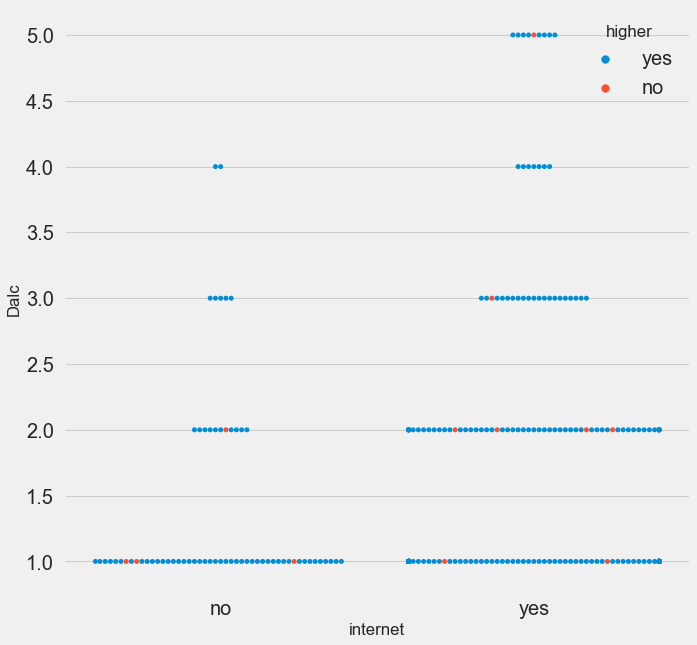

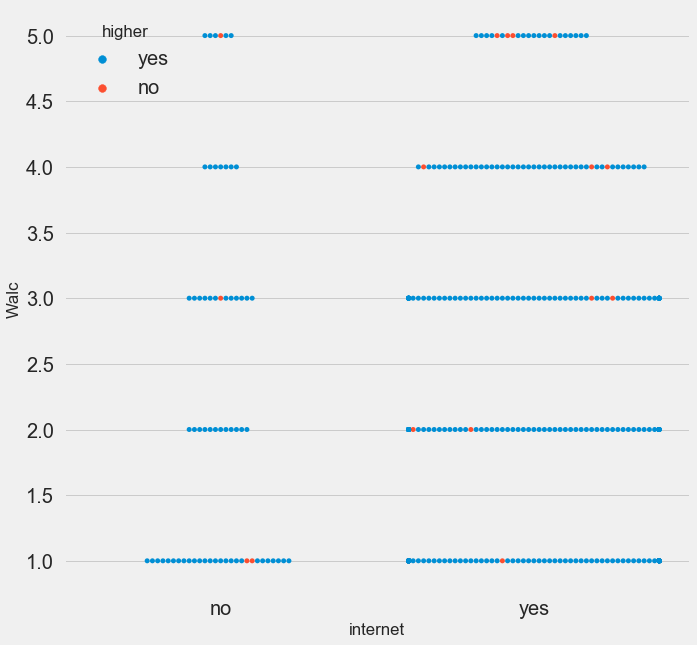

In [378]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="internet",y="Dalc",hue="higher",data=alcohol)
plt.show()

plt.figure(figsize=(10,10))
sns.swarmplot(x="internet",y="Walc",hue="higher",data=alcohol)
plt.show()